<a href="https://colab.research.google.com/github/Lashi0812/AppiledAI/blob/master/ch16%20NeuralNetwork/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying the Movie reviews

In [50]:
from tensorflow.keras.datasets import imdb
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt


In [14]:
print(f"Totol num of words : {len(imdb.get_word_index())}")
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
print(f"Out of {len(imdb.get_word_index())} we are selecting top 10000 most frequents words")

Totol num of words : 88584
Out of 88584 we are selecting top 10000 words


In [18]:
tf.math.reduce_max([tf.math.reduce_max(sequence) for sequence in train_data])

<tf.Tensor: shape=(), dtype=int32, numpy=9999>

In [17]:
help(tf.math.maximum)

Help on function maximum in module tensorflow.python.ops.gen_math_ops:

maximum(x, y, name=None)
    Returns the max of x and y (i.e. x > y ? x : y) element-wise.
    
    Example:
    
    >>> x = tf.constant([0., 0., 0., 0.])
    >>> y = tf.constant([-2., 0., 2., 5.])
    >>> tf.math.maximum(x, y)
    <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 2., 5.], dtype=float32)>
    
    Note that `maximum` supports [broadcast semantics](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) for `x` and `y`.
    
    >>> x = tf.constant([-5., 0., 0., 0.])
    >>> y = tf.constant([-3.])
    >>> tf.math.maximum(x, y)
    <tf.Tensor: shape=(4,), dtype=float32, numpy=array([-3., 0., 0., 0.], dtype=float32)>
    
    The reduction version of this elementwise operation is `tf.math.reduce_max`
    
    Args:
      x: A `Tensor`. Must be one of the following types: `bfloat16`, `half`, `float32`, `float64`, `int8`, `uint8`, `int16`, `uint16`, `int32`, `uint32`, `int64`, `uint64`

1. maximum compare the two tensor
2. reduce_max - element wise operation


In [4]:
train_data.shape,train_labels.shape,test_data.shape,test_labels.shape

((25000,), (25000,), (25000,), (25000,))

In [9]:
type(train_data[0]),len(train_data[0])
# each review is the list of word indices 
# since each review contain different lenghts it store in list
# that why there is axis 1 in the tensor.

(list, 218)

In [8]:
train_labels[0]

1

In [19]:
# decoding review back to text
word_index = imdb.get_word_index()
type(word_index)

dict

In [22]:
dict(list(word_index.items())[:2])

{'fawn': 34701, 'tsukino': 52006}

In [25]:
reverse_word_index = {value:key for (key,value) in word_index.items()}
dict(list(reverse_word_index.items())[:2])

{34701: 'fawn', 52006: 'tsukino'}

In [27]:
decode_review = " ".join([reverse_word_index.get(i-3,"?")for i in train_data[0]])
decode_review
# Decodes the review. Note that the indices are offset by 3 
# because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data

* Since each review has the different lengths, we have to make them as tensor, two ways do this.
    1. `Pad the each list` so that all the sample will the same lenght,then add the `Embedding layer` to handle the list of integers.
    2. `Multi Hot Encoding` - turn the list into 0's and 1's .Now we will have the 10000 dimension vector.

In [32]:
a = np.zeros(shape=(4,10))
a[1,[1,2,5]] = 1.
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
def vectorize_sequence(sequences,dimension=10000):
    results = np.zeros(shape=(len(sequences),dimension))
    for i,seq in enumerate(sequences):
        results[i,seq] = 1.
    return results

In [41]:
x_train = vectorize_sequence(train_data).astype("float32")
x_test = vectorize_sequence(test_data).astype("float32")

In [42]:
x_train[0],type(x_train[0]),x_train.shape,x_train.dtype

(array([0., 1., 1., ..., 0., 0., 0.], dtype=float32),
 numpy.ndarray,
 (25000, 10000),
 dtype('float32'))

In [38]:
type(train_labels),train_labels.dtype

(numpy.ndarray, dtype('int64'))

In [43]:
y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")

# Building model
1. input data --> vector of 10000-D
2. output data --> scalar 0's or 1's

A type of model that perform well on such problem is plian stack of densely connected layers with `relu activations`.


Here we have to make to two key architecture decision.
1. Number of layers needed.
2. Number of units is needed in the each layer.

In [99]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

1. Having 16 units means --> shape of weight matrix is (input_dimension,16)
2. dot product with input data will project the data into 16 dimensional `representation space`.
3. You can intuitively understand the dimensionality of representation space as `to learn the complex relation of data.`

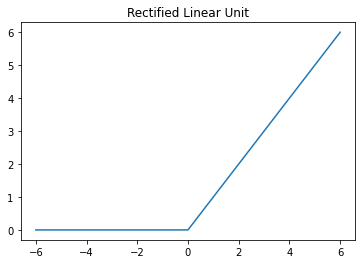

In [84]:
# intermediate layer having the relu "rectified linear unit"
x = np.linspace(-6,6,1000)
y = np.maximum(x,[0.])
plt.plot(x,y)
plt.title("Rectified Linear Unit")
plt.show()

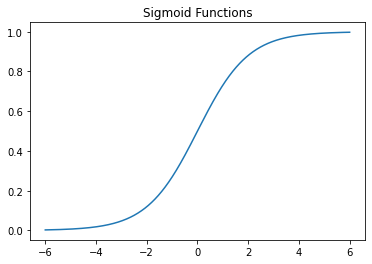

In [85]:
# output layer as the sigmoid 
# since it is two class classifcation we can iterpet as probablity
from scipy.special import expit
y = expit(x)
plt.plot(x,y)
plt.title("Sigmoid Functions")
plt.show()

In [100]:
# compile the model
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [101]:
# split the dataset
num_val_samples = 10000
x_val = x_train[:num_val_samples]
partial_x_train = x_train[num_val_samples:]
y_val = y_train[:num_val_samples]
partial_y_train = y_train[num_val_samples:]

In [102]:
# train the model
history = model.fit(x=partial_x_train,
                    y=partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5053 - accuracy: 0.7965 - val_loss: 0.3978 - val_accuracy: 0.8539
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3100 - accuracy: 0.9017 - val_loss: 0.3133 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2283 - accuracy: 0.9267 - val_loss: 0.2804 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1794 - accuracy: 0.9406 - val_loss: 0.2735 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1469 - accuracy: 0.9522 - val_loss: 0.2768 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1223 - accuracy: 0.9610 - val_loss: 0.2893 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1034 - accuracy: 0.9683 - val_loss: 0.3262 - val_accuracy: 0.8770
Epoch 8/20
30

In [103]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

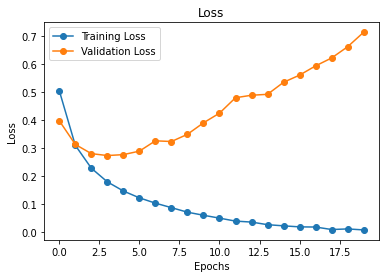

In [104]:
plt.plot(np.arange(20),history_dict["loss"],label="Training Loss",marker="o")
plt.plot(np.arange(20),history_dict["val_loss"],label="Validation Loss",marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()
plt.show()

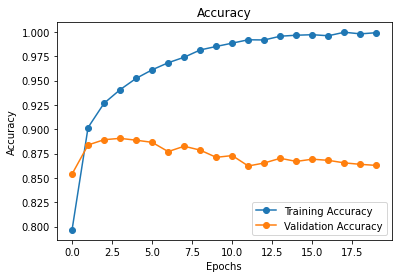

In [105]:
plt.plot(np.arange(20),history_dict["accuracy"],label="Training Accuracy",marker="o")
plt.plot(np.arange(20),history_dict["val_accuracy"],label="Validation Accuracy",marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

Model is overfitting.

In [109]:
# retrain the model and stop in the training after fourth iteration.
model = keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1,activation="sigmoid")
])

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

model.fit(x=partial_x_train,
        y=partial_y_train,
        epochs=4,
        batch_size=512
        )

results = model.evaluate(x_test,y_test)

Epoch 1/4
30/30 [==============================] - 3s 44ms/step - loss: 0.5213 - accuracy: 0.7787
Epoch 2/4
30/30 [==============================] - 1s 32ms/step - loss: 0.3088 - accuracy: 0.9023
Epoch 3/4
30/30 [==============================] - 1s 32ms/step - loss: 0.2269 - accuracy: 0.9274
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3013 - accuracy: 0.8782


In [110]:
results

[0.301333487033844, 0.8781599998474121]

# Future Experiments

In [ ]:
def model_experiment(num_layers,units,activations,loss):
    representation_layer = [layers.Dense(units=u,activation=a)
      for u,a in zip(units,activations)]

